# 动态风环境中多污染源机器人主动嗅探辨识
<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:0rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b>Copyright 2023 @ Authors</i></b><br/>
        作者：
            <b>
            <a href="zhhl_email@qq.com"> 张宏亮 📨 </a>
            </b>
        </i>
        <br/>
        日期：2023-08-27</i><br/>

</div>


<p style="color:purple; font-weight:bold">HIGHLIGHT:</p>
<p style="color:purple; font-weight:bold">本文提出小生境粒子群算法（Niche-DPSO）对城市动态风环境中的多个污染源进行主动嗅探溯源</p>

<p>小生境方法 (Niching Techniques) 可以动态的形成相互独立的搜索空间，实现对对个极值区域的同步搜索，以维持种群的多样性，增强个体的探索能力，特别适合用于求解多模态问题中。基于PSO算法中的小生境形成、进化以及相互协作是解决多模态问题的关键</p>

<div>
    <img src="https://s2.loli.net/2023/08/26/rcvm8XP2VHaZ3Oe.png" alt="Fig2" style="zoom: 15%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜小生境寻源过程</p>
</div>

<div style="width:auto; height:2px; background:linear-gradient(244deg,rgba(0,0,0,0) 0%,rgba(0,0,0,0.5) 50%,rgba(0,0,0,1) 100%)"></div>

<div class="alert alert-success">
受生物嗅觉的启发，结合移动传感器和浓度传感器的机器人主动嗅探以实现释放源的主动定位、污染源分布地图构建和历史释放轨迹引导等研究内容逐渐受到学者重视。
</div>

## 目录
* [背景介绍](#layer1)
* [多机器人主动嗅探过程](#layer2)
    * [羽流发现](#2-1)
    * [羽流追踪](#2-2)
    * [羽流确认](#2-2)
* [多模态求解Niche-DPSO算法](#layer3)
    * [小生境形成](#3-1)
    * [小生境进化](#3-2)
    * [小生境解散](##3-3)
    * [其他行为保障](##3-4)
* [MUST实验主动溯源](#layer4)
    * [计算域定义](#4-1)
    * [动态边界条件](#4-2)
    * [CFD正向结果](#4-3)
* [代码实现](#layer5)
    * [导入相关库及文件](#5-1)
    * [相关类实例化](#5-2)
    * [迭代及可视化](#5-3)
* [不足及展望](#layer6)    

# 1. 背景介绍<a id='layer1'></a>
利用移动传感器进行污染源项的估计是一个较新的领域，在利用现有静态传感器溯源理论的基础上，结合传感器的路径规划策略、传感器间的相互协作方法以及传感器自身的动力学控制，可以帮助人们获取更多的有效信息用于污染源的定位。

机器人主动嗅探研究是一项多学科交叉融合的研究领域，涉及移动机器人的导航和控制、传感器信息处理、生物仿生学、机器学习和流体力学等多个研究领域。在有毒/有害气体泄漏源查找、违禁品检查、灾难营救及恐怖袭击等诸多方面均有着巨大的应用前景。

街区动态风环境中的污染源辨识存在两个难点，一是在自然环境中污染羽流的输运通常是由湍流主导而非扩散主导，这无疑增强了污染物传输过程的非线性特征，二是动态变化风向和风速使得污染物呈不稳定传播。因此，污染物在街区内的分布由于湍流效应和动态气流的影响而变得异常复杂，此时传统主动溯源方法在该系统中表现不佳。
<div>
    <img src="https://s2.loli.net/2023/08/26/odFivDIYJO3y7PT.png" alt="Fig2" style="zoom: 18%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜机器人主动嗅探溯源过程</p>
</div>

## 2. 多机器人主动嗅探过程<a id='layer2'></a>

### 2.1 羽流发现<a id='2-1'></a>

污染羽流发现过程的目标是使机器人在初始阶段尽快探测到污染物的烟羽，以便开始下一步的羽流追踪过程。污染羽流发现算法常用于污染源定位任务刚开始或长时间丢失污染羽流的情形，对于机器人则是污染羽流信息从无到有的过程。其目标是使机器人最快速度的接触到烟羽。

常用的污染羽流发现策略分为被动监测和主动搜索两种。初始状态时多机器人随机分散在街区内的各点处，并在监测到污染物前均保持原地不动，此时与固定传感器类似。该方法在污染物羽流发现过程中消化能量最少，但在突发污染物泄漏时需花费较长时间进行羽流搜索。

另外一种广泛采用的是主动遍历算法，指每个单体机器人从初始位置出发向外做扩散搜索运动，以逐渐覆盖整个搜索区域，常用的有Spiral遍历算法，字形遍历算法，当机器人在运动到搜索范围的边界仍没发现羽流时，机器人会以一定的角度反射边界离开并继续搜索。当任一机器人监测到污染物羽流时，将终止污染羽流发现阶段，进入污染羽流追踪过程。
<div>
    <img src="https://s2.loli.net/2023/08/26/xocrOyDwu4Mkh6H.png" alt="Fig2" style="zoom: 15%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜污染羽流主动遍历算法示意图</p>
</div>

### 2.2 羽流追踪<a id='2-2'></a>

针对不同的流场环境和污染物类型，其传播方式和扩散特征各异，因此所采用的污染羽流追踪算法也不尽相同，目前各学者针对机器人主动嗅探溯源的研究也多集中在此。污染羽流的追踪过程本质上是一种极值寻优过程，但由于城区中气流呈现动态变化特点，使得污染羽流在搜索空间中存在多极值点、参数变量不连续、参数实时变化等，致使污染源在辨识过程中难度巨大。

采用传统的梯度优化方法在污染源搜索过程中面临建模困难、易陷入局部极值、搜索过程梯度丢失等问题。粒子群算法 (Particle Swarm Optimization, PSO) 在传统的寻优问题中应用广泛，具有天然的并行特性和无需针对复杂问题进行严格的数学描述等优点，在解决街区污染源追溯反演问题中备受关注，但是传统的PSO算法中固定设置的参数往往容易导致机器人在寻优过程中陷入局部极值，或更新速度过慢，大大降低了突发污染源追溯的准确性和时效性，对此本文将反向学习方法引入PSO算法以帮助机器人脱离局部最优，并采用参数动态调整方法以平衡不同阶段的自我认知和种群认知能力的权重。

粒子群优化算法是一种受鸟类捕食行为启发的智能优化算法，其搜索过程基于群体来完成最优区间的搜索。假设PSO的搜索空间为n维，并包含$N$个粒子，其中第$i$个粒子的位置可表示为$n$维向量${X_i} = {({x_{i1}},{x_{i2}}, \cdots ,{x_{in}})^T} \in S$，同样第$i$个粒子的速度也可表示为n维向量 。在搜索空间$S$中单个粒子所搜索到的适应度最好的位置可表示为${P_i} = {({p_{i1}},{p_{i2}}, \cdots ,{p_{in}})^T}$。假设下标$g$代表种群中所有粒子所搜索到的适应度最好的粒子。机器人利用PSO算法进行交互并发现污染源的步骤可表述如下:

$${V_i}(t + 1) = w{V_i}(t) + {c_1}{r_1}({P_i}(t) - {X_i}(t)) + {c_2}{r_2}({P_g}(t) - {X_i}(t))$$

其中$i = 1,2, \cdots ,N$为求解变量的的维度，$w$为惯性参数来衡量粒子的全局搜索能力和局部搜索能力；$c_1$和$c_2$分别为来自个体和群体的调整参数，$r_1$和$r_2$为[0, 1]范围内的随机数；${P_i}(t) - {X_i}(t)$和${P_g}(t) - {X_i}(t)$分别为粒子的自我认知和全局认知部分。PSO算法执行过程中将重复执行式上式以完成迭代过程。

将式中的$c_1$、$c_2$和$w$视为随PSO的搜索过程动态变化，以有效平衡PSO算法在不同阶段的自我认知和种群认知能力。选取较为合适的参数取值，其中$c_{ini1}$=2.5，$c_{end1}$=0.5，$c_{ini2}$=0.5，$c_{end2}$=2.5，$t_{max}$为最大迭代步数，此时单个粒子在搜索初始阶段具有较强的自我认知能力和较弱的全局认知能力，以便于对整个搜索空间进行探索；而在搜索的后期降低粒子的自我认知能力并提升全局认知能力可以加快粒子收敛于全局最优值。同时，随机选取惯性参数w可以提高了优化过程早期的收敛性，较大的惯性参数可以降低陷入局部极小值的概率。

$${c_1} = \left( {{c_{{\rm{ini\_1}}}} + {{{c_{{\rm{end\_1}}}} - {c_{{\rm{ini\_1}}}}} \over {{t_{\max }}}} \times t} \right) \times {{{\alpha _2}} \over {{\alpha _1} + {\alpha _2}}}$$

$${c_2} = \left( {{c_{{\rm{ini\_2}}}} + {{{c_{{\rm{end\_2}}}} - {c_{{\rm{ini\_2}}}}} \over {{t_{\max }}}} \times t} \right) \times {{{\alpha _1}} \over {{\alpha _1} + {\alpha _2}}}$$

$$w = 0.4 + \left[ {{{N\left( {0,{\rm{ }}1} \right)} \over {10}} + {{U\left( {0,{\rm{ }}1} \right)} \over 2}} \right]$$

受动物觅食方法的启发，PSO算法吸收了化学趋向性 (Chemotaxis) 和风趋向性(Anemotaxis) 的思想，化学趋向性使得粒子可以沿污染物的浓度梯度进行更新，其风趋向性使粒子可以测量街区内的风速和风向并迎风而上发现污染源位置。通过参数${\alpha _1}$和${\alpha _2}$以利用风向信息，${\alpha _1}$为${P_i} - {X_i}$和$-W$之间的夹角，${\alpha _1}$为${\alpha _1}$为${P_g} - {X_g}$和$-W$之间的夹角，定义如下：

$${\alpha _1} = \arccos \left( {{{({P_i} - {X_i}) \cdot ( - W)} \over {{\rm{||}}{P_i} - {X_i}{\rm{||}} \cdot {\rm{|| - }}W{\rm{||}}}}} \right)$$

$${\alpha _2} = \arccos \left( {{{({P_g} - {X_i}) \cdot ( - W)} \over {{\rm{||}}{P_g} - {X_i}{\rm{||}} \cdot {\rm{|| - }}W{\rm{||}}}}} \right)$$

PSO算法在保证收敛性的同时需有一定的多样性来面对搜索环境的改变做出及时的搜索反馈，无论是通过参数的选取、小生境技术的采用或者其他与算法相融合的技术改进PSO算法，其目的都是希望在加强算法局部搜索能力的同时，保持种群的多样性，防止算法在快速收敛的同时出现早熟收敛。本文采用反向学习方法(Opposition-based learning PSO, OBL-PSO)，当监测到算法陷入局部最优时，利用具有较差适应度粒子的位置信息作为反向点指导部分粒子以较快飞行速度进行反向学习，将其迅速牵引处局部最优区域。参考下式：

$$V_i^n(t + 1) = {w^n}V_i^n(t) + {c_3}{r_3}(P_i^w(t) - {X_i}(t)) + {c_4}{r_4}(P_g^w(t) - {X_i}(t))$$

### 2.3 羽流确认<a id='2-3'></a>

污染源确认是指通过某种策略或算法确定某地污染源的真实存在。通过对污染源进行分析发现其具有以下两个特征：（1）污染源附加区域能长时间维持相对高的浓度峰值，即持久性；（2）污染源的扩散方向为四周扩散，即发散性。在街区环境中，由于污染物传输的湍流特性，只搜寻瞬间浓度的最大值是不足以确定污染源的所在，同时，仅借助污染物浓度传感器和风速/风向传感器来确认污染源又是一项很有挑战的工作。本文采用质量通量3步确认法，该方法在实施过程中简单有效。
<div>
    <img src="https://s2.loli.net/2023/08/27/12qPKZWf7YnVh8G.png" alt="Fig2" style="zoom: 70%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜污染羽流主动遍历算法示意图</p>
</div>


## 3. 多模态求解Niche-DPSO算法<a id='layer3'></a>

### 3.1 小生境形成<a id='3-1'></a>

受社会蜘蛛优化算法 (Social spider optimization, SSO) 启发，将蜘蛛网类比于小生境形成范围、粒子个体类比为蜘蛛、适应度值类比于蜘蛛网振动的能量，当蜘蛛在网中心发出振动时，处于$Gr$范围内的位置将感知到的振动，其强度与距中心的距离和中心处蜘蛛的重量相关。此时在PSO中某机器人j接受到的振动强度 取决于产生振动的机器人$i$的适应度值 和距机器人i的距离 ，图中展示了利用SSO算法中的振动-感应思想来确定小生境的生成半径。

$${V_{ij}} = fi{t_i} \times \exp ( - {d_{ij}})$$

<div>
    <img src="https://s2.loli.net/2023/08/27/MOKQwYUn8vZdzqT.png" alt="Fig2" style="zoom: 60%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜小生境半径与$Gr$内振动感应强度关系</p>
</div>


### 3.2 小生境进化<a id='3-2'></a>

在烟羽跟踪过程中，多个小生境可能同时朝同一个污染源移动收敛而造成了搜索效率下降。因此需要定义两个小生境的合并机制，即小生境$a$和小生境$b$的全局极值$P_g$之间的距离小于各自的半径之和，且两个全局极值机器人的飞行方向相同，即满足下式，则合并两个小生境。其中，$X_a^g(t)$和$X_b^g(t)$分别为小生境$a$和小生境$b$中$t$时刻全局极值的位置， $G{r_a}$和$G{r_b}$分别为小生境$a$和小生境$b$的半径，$V_a^g(t)$和$V_b^g(t)$分别为小生境$a$和小生境$b$中$t$时刻全局极值的速度。

$$\left\{ {\matrix{
  {{{\left\| {X_a^g(t) - X_b^g(t)} \right\|}_2} < G{r_a} + G{r_b}} \cr 
  {V_a^g(t) \cdot V_b^g(t) > 0} \cr 
 } } \right.$$

随着小生境的不断进化和合并，当机器人距离污染源较近时各小生境中的机器人数量越来越多、聚集程度越来越大，此时需要限制单个小生境中种群的大小以充分提高多污染源的搜索效率。定义小生境$a$中机器人种群的聚集度$m_a$为下式：

$${m_a} = {1 \over {{N_a}}}\sum\limits_{k = 1}^{{N_a}} {s(k,g)} $$

$$s(k,g) = \left\{ {\matrix{
   0 \hfill & {d(k,g) \ge {d_{\max }}} \hfill  \cr 
   {1 - {{[{{d(k,g)} \over {G{r_a}}}]}^\gamma }} \hfill & {{d_{\min }} \le d(k,g) < {d_{\max }}} \hfill  \cr 
   1 \hfill & {d(k,g) < {d_{\min }}} \hfill  \cr 
 } } \right.$$

根据总机器人数量$n$和假设的污染源个数$m$，定义了每个小生境中最大的种群规模$G_a^{{\rm{size}}}$为下式,其中，$\alpha $和$\beta $为可调参数，分别默认为0.5和0.9。

$$\ G_a^{\text{size}} = \alpha \frac{n}{m} + \beta N_a \times \left( \frac{1}{1 + e^{-\frac{n}{m}}} - \frac{1}{1 + e^{-m_a}} \right) \$$



### 3.3 小生境解散<a id='3-3'></a>

污染羽流追踪过程中，如果小生境$a$的聚集度$m_a$大于预先设定值$\varepsilon $，且小生境中的全局适应度极值$fit_a^g$大于设定值，即满足下式，则认为该小生境已准确定位到污染源，并设定该点附近的搜索禁忌区域，随后解散该小生境，并分配其中的机器人参与其他污染源的搜索。

$$\left\{ {\begin{array}{*{20}{c}}
{{m_a} > \varepsilon }&{{\rm{defult}} = 0.85}\\
{fit_a^g > C_{th}^g}&{{\rm{defult}} = 0.70}
\end{array}} \right.$$

在小生境$a$的解散重新分配过程中，小生境$a$中的第$k$个粒子进入小生境$b$的“效用”$U_b^k$，计算方法如下式，由“Need”和“Cost”组成，$w_1$和$w_2$为调整参数，默认分别为0.4和0.6；“Cost”考虑小生境$a$中待分配的机器人$k$的位置$X_a^k$与小生境%b%中全局极值的位置$X_a^k$之间的距离。

$$U_b^k = \begin{array}{*{20}{c}}
{\underbrace {\exp ( - {w_1} \times fig_b^g + {w_2} \times {N_b})}_{{\rm{Need}}} - \underbrace {{\rm{||}}X_b^g - X_a^k{\rm{|}}{{\rm{|}}_2}}_{{\rm{Cost}}}}&{k = (1,2, \ldots ,{N_a})}
\end{array}$$

### 3.4 其他行为保障<a id='3-4'></a>

为减小在仿真环境中与真实环境中的实验结果的差别，并考虑真实机器人的运动学特性。文中对机器人的运动速度大小进行约束 ，在本文中Vmax为20m/s。带有随机定位误差的机器人位置定义为下式。

$${X_i}(t + 1) = {X_i}(t) + {V_i}(t + 1) + \left[ {\begin{array}{*{20}{c}}
{{x_e}}\\
{{y_e}}\\
{{z_e}}
\end{array}} \right],{\rm{where}}\left\{ {\begin{array}{*{20}{c}}
{{x_e} = m + (n - m)*{\rm{rand}}( - 1,1)}\\
{{y_e} = m + (n - m)*{\rm{rand}}( - 1,1)}\\
{{z_e} = m + (n - m)*{\rm{rand}}( - 1,1)}
\end{array}} \right.$$


机器人所携带的探测污染物浓度的传感器响应性能定义为下式。其中${S_i}(t)$为第$i$个机器人所携带传感器在$t$时刻的响应值，${C_i}(t)$为此时该点处真实浓度值，$e(t)$为该时刻传感器的随机测量误差。

$${S_i}(t) = \left\{ {\begin{array}{*{20}{c}}
{{C_i}(t) + e(t)}&{{C_i}(t) \ge {C_0}}\\
0&{{C_i}(t) < {C_0}}
\end{array}} \right.$$

低空融合空域内，执行污染物溯源任务的机器人与静态的建筑障碍物和动态的机器人共享同一空域，当空域内流量过大时，极易发生危险接近甚至相撞事件，严重阻碍了城市环境中的污染物溯源任务的正常进行，需在搜索过程中及时解算冲突解决路径，并驱动机器人按照安全路径前进，本文采用式场法进行避障。

$$U(q) = {U_{{\rm{att}}}}(q) + {U_{{\rm{rep}}}}(q)$$

$$F(q) =  - \nabla U(q) = {F_{{\rm{att}}}}(q) + {F_{{\rm{req}}}}(q)$$


<div>
    <img src="https://s2.loli.net/2023/08/27/5YQSCMRewJnapAg.png" alt="Fig2" style="zoom: 60%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜Niche-DPSO多污染源搜索过程</p>
</div>


## 4. MUST实验主动溯源<a id='layer4'></a>

### 4.1 计算域定义<a id='4-1'></a>

本文采用著名的MUST (Mock Urban Setting Test)实验[142] [143]对不同大气分层条件下的污染物传播情况模拟分析进而对源信息进行反演。该实验于2001年9月在美国Army Dugway实验场利用集装箱模拟建筑布局，探究不同气象条件对点源释放的污染物扩散规律的影响，数据集可从https://atmosphericdispersion.fandom.com/wiki/Main_Page查找。

<div>
    <img src="https://s2.loli.net/2023/08/27/CfVJhYgUXeFdLEa.png" alt="Fig2" style="zoom: 40%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜MUST 实验的建筑排列和污染物释放点和测量点</p>
</div>

### 4.2 动态边界条件<a id='4-2'></a>

在实际街区环境中的风场是动态变化的，污染源的释放规律也可能是时间的函数，风场的变化尤其是风向的实时变化会对寻源结果的准确性和时效性起到决定性作用[114]。目前关于污染源在动态风场或气流组织下的污染源定位研究较为匮乏，大部分学者在研究中忽略了气流组织动态变化对污染源定位的影响。选取某地一段时间内 (1200s) 的风向和风速如下图所示。在模拟时间段内摩擦速度$u^*$的变化范围为1.8-7.6 m/s之间，风向的变化范围为-15°-37°。
<div>
    <img src="https://s2.loli.net/2023/08/27/9TpKBd2evx6GwaX.png" alt="Fig2" style="zoom: 70%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜街区动态风环境</p>
</div>

### 4.3 CFD正向结果<a id='4-3'></a>

通过CFD模型得到两个污染源在A点 (1.6m, 124.3m, 236m) 和B点 (1.6m, 71m, 236m) 时于T=0s时刻进行释放，得到的污染羽流逐时扩散结果。下图展示了6个时刻 (200s, 400s, 600s, 800s, 1000s, 1200s) 1.6m高度处的污染物浓度分布情况。与稳定风场中污染物的扩散过程相比，动态风环境中污染物的输运扩散显示出强烈的随机性，没有确定方向的污染羽流，在T=800s时刻和T=1200s时刻展现出的羽流方向甚至完全相反。


<div>
    <img src="https://s2.loli.net/2023/08/27/vUHzI6Ko2Ot3E9F.png" alt="Fig2" style="zoom: 10%;">
    <p style='font-size:0.8rem; font-weight:bold'>图｜污染物浓度场动态变化情况</p>
</div>

## 5. 代码实现<a id='layer5'></a>
<div style="padding: 10px; background-color: #f5f5f5; color: black; margin-bottom: 15px; border-radius: 30px;">
    <p style='padding: 10px'>代码不依赖框架，仅需python>=3.0及基础python库即可完成</b></p>
        <p style='padding-left: 10px; padding-right: 10px;'>自己的时间比电脑是时间更宝贵，比起代码执行效率更注重可读性</p>
</div>

<div style="width:auto; height:2px; background:linear-gradient(244deg,rgba(0,0,0,0) 0%,rgba(0,0,0,0.5) 50%,rgba(0,0,0,1) 100%)"></div>

查看文件夹中包含的相关py文件

In [11]:
!tree ../Niche-DPSO -L 3 | grep -v '__' | grep -v '.pyc' | grep -v '.ipynb'

../Niche-DPSO
├── algorithm
│   ├── PSO.py
│   ├── fitness_wind_function.py
│   ├── functions.py
│   ├── obstacle_define_and_avoid.py
│   └── wind_use.py
├── data
│   ├── input_data
│   │   ├── 1200-5
│   │   └── fluent_data_transfer.py
│   └── output_data
│       └── figure_plot.py
└── robots
    ├── UAVs.py

11 directories, 18 files


### 5.1 导入相关库及其他文件<a id='5-1'></a>


In [14]:
!pip install matplotlib --upgrade --quiet
%matplotlib inline
%run ./algorithm/functions.py
from numpy import sin, cos, arccos, array, zeros, random, where, linalg, exp, pi, full, load, meshgrid, arange, sqrt, dot
# from obstacle_define_and_avoid import Obstacle
import re
from scipy.ndimage import distance_transform_edt as bwdist
from itertools import repeat
from IPython.display import clear_output
from tqdm import tqdm
import math
from data.input_data.fluent_data_transfer import Fluent2python
from algorithm.fitness_wind_function import Fitness
from algorithm.fitness_wind_function import Wind
from algorithm.obstacle_define_and_avoid import Obstacle
from data.output_data.figure_plot import Figure_plot
from robots.UAVs import UAV, Niche, Map
import robots.UAVs

### 5.2 相关类的实例化<a id='5-2'></a>
适应度类 | 风向风速类 | 绘图类 | 地图类 | 无人机类 | 小生境类

In [15]:
# 一些预处理参数-------------------------------------
func = Fitness()                 # 实例化适应度函数
wind = Wind()                    # 实例化风向函数
# fluent2python = Fluent2python()  # 实例化fluent数据函数
# uds_t, wind_t, grid_x, grid_y = fluent2python.file_to_array()   # 获取fluent数据


# 记录每个小生境步最佳适应度的变化情况
gbest_fitness_change = list(repeat([], robots.UAVs.robots_number)) # 生成包含10个列表元素的列表 

# 实例化画图类
figure = Figure_plot()

# 实例化地图
M = Map()
O = Obstacle(rows=M.map_y_upper, cols=M.map_x_upper, dx=M.dx, dy=M.dy)
obstacles_info = O.obstacle_define(M.obstacle_list) # 获取障碍物数组
list_old = M.taboo_center.copy() # 判断列表是否发生变化
taboo_zone = taboo_zone_cal(M)

# 实例化几个无人机出来
U = []
for i in range(robots.UAVs.robots_number):
    U.append(UAV())
    U[i].NO = i
    U[i].position = position_initial_random_position(M.dimension, M.map_x_lower, M.map_x_upper, M.map_y_lower, M.map_y_upper)
    # U[i].position = position_initial_fixed_position_around(i)

    U[i].position_history.append(U[i].position.tolist()[0])
    U[i].velocity = initial_velocity(M.dimension, U[i].max_val, U[i].min_val)
    U[i].unit_vector = normalize(U[i].velocity)

# 实例化几个小生境出来, 最多有niche_number个小生境
N = []
niche_number = robots.UAVs.robots_number
for i in range(niche_number):
    N.append(Niche())
    N[i].NO = i

### 5.3 迭代运行<a id='5-3'></a>

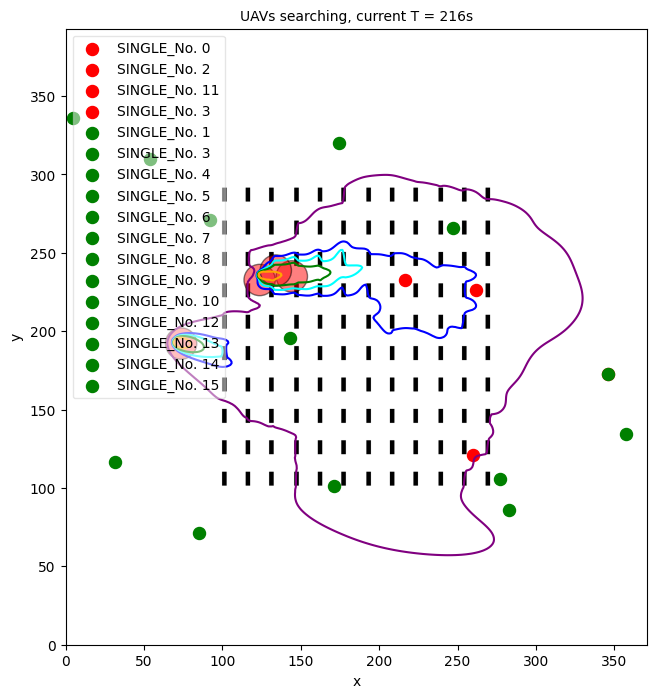

In [16]:
# 真实污染源位置
source_1 = array([70.7, 193.8])
source_2 = array([124.5, 263.7])
distance_error = 50
source_1_check = []
source_2_check = []

#% 迭代过程
exit_flag  = False # 用于直接跳出主循环用的
success = False  # 用于判断是否溯源成功
####################################开始迭代####################################
for iter_num in (range(1, robots.UAVs.total_iter+1)): 

    uds_t_1  = load(f'data/input_data/1200-5/uds_t_{iter_num*robots.UAVs.response_time}.npy')
    uds_t =  uds_t_1*(1+random.uniform(-robots.UAVs.errorness, robots.UAVs.errorness))
    wind_t = load(f'data/input_data/1200-5/wind_t_{iter_num*robots.UAVs.response_time}.npy')
    grid_x = load(f'data/input_data/1200-5/grid_x.npy')
    grid_y = load(f'data/input_data/1200-5/grid_y.npy')

    if exit_flag:
        break

    #---------------检测列表是否反生变化
    list_new = M.taboo_center # 判断列表是否发生变化
    if list_new != list_old:
        taboo_zone = taboo_zone_cal(M)
        list_old = list_new.copy()
    #--------------- 

    # =========================================================================
    # 第一阶段, 羽流发现         
    # =========================================================================
    # 循环所有的无人机
    for i in range(robots.UAVs.robots_number):
        # 计算每个无人机适应度
        U[i].fitness = func.fitness_func(U[i].position, uds_t)
        # 躲避禁区
        U[i].fitness = taboo_zone_avoid_force(U[i].position, U[i].fitness, taboo_zone)
        # 记录历史移动位置
        U[i].position_history.append(U[i].position.tolist()[0])
        U[i].fitness_history.append(U[i].fitness)
        # 羽流检测
        U[i].in_plume = check_plume(func, M, U[i].position, uds_t)                       
        # 转向, 在羽流中时则不再进行此更新
        # if U[i].turning == True and U[i].in_plume == False:
        #     U[i].unit_vector = zigzag(M, U[i].unit_vector, turn_num_2[i])
        #     turn_num_2[i] += 1

        # 碰壁检测
        U[i].rebound = check_boundary(M, U[i].position)

        # 如果rebound为false, 则执行step_func前进一步, 在羽流中时则不再进行此更新
        if U[i].rebound == False and U[i].in_plume == False:   
            # 记录历史移动位置
            U[i].position = step_func(U[i].position, U[i].unit_vector, U[i].step)
            U[i].position_history.append(U[i].position.tolist()[0])
            # 限制粒子位置
            U[i].position, U[i].velocity = boundary_handle(M, U[i].position, U[i].velocity)
            # 碰壁检测
            U[i].rebound = check_boundary(M, U[i].position)

            # 如果前进后碰壁, 则回退一步, 并进行20米的反弹
            if U[i].rebound == True:
                U[i].unit_vector = -U[i].unit_vector
                U[i].position = step_func(U[i].position, U[i].unit_vector, 1*U[i].step)
                # 限制粒子位置
                U[i].position, U[i].velocity = boundary_handle(M, U[i].position, U[i].velocity)
                U[i].position_history.append(U[i].position.tolist()[0])
                # 再随机一个初始方向
                # V = random.uniform(size=(1,robots.UAVs.dimension))
                # U[i].unit_vector = normalize(V)

                # 再旋转45度弹出
                U[i].unit_vector = turn_45_vector(U[i].unit_vector)

    # 循环所有的无人机
    for i in range(robots.UAVs.robots_number):      
        if U[i].in_niche == False:
            # 先检查周围有没有可加入的小生境, 存入candidate_niche
            candidate_niche = []
            # 计算无人机与各小生境中心的距离是否小于半径
            for j in range(niche_number):
                if len(N[j].menbers) != 0:
                    distance = linalg.norm(U[i].position - N[j].gbest_position)
                    if distance < robots.UAVs.niche_radius:
                        N[j].vibration = N[j].gbest_fitness * exp(-distance)
                        candidate_niche.append(N[j])
            # 比较哪个小生境的振动值大, 则加入相应的小生境  
            if len(candidate_niche) > 0:
                largest_vibration = float('-inf')
                for j in range(len(candidate_niche)):
                    if(candidate_niche[j].vibration > largest_vibration):
                        largest_vibration = candidate_niche[j].vibration # 寻找最大的振动值
                        largest_vibration_index = candidate_niche[j].NO  # 最大振动值的小生境

                U[i].in_niche = True
                U[i].belonged_niche_NO = largest_vibration_index
                U[i].pbest_fitness = U[i].fitness    # 初始化
                U[i].pbest_position = U[i].position  # 初始化
                U[i].pworst_fitness = U[i].fitness   # 初始化
                U[i].pworst_position = U[i].position # 初始化


                N[largest_vibration_index].menbers.append('UAV_' + str(i))
                N[largest_vibration_index].UAVs_position['UAV_' + str(i)] = U[i].position # UAVs_position应该是每步变化的
                N[largest_vibration_index].UAVs_fitness['UAV_' + str(i)] = U[i].fitness 
                N[largest_vibration_index].UAVs_unit_vector['UAV_' + str(i)] = U[i].unit_vector                

        # 如果没有可加入的小生境, 每个在羽流内的无人机, 且不在小生境中, 则形成只有自己的小生境
        if U[i].in_niche == False and U[i].in_plume == True:
            U[i].in_niche = True
            U[i].belonged_niche_NO = N[i].NO
            U[i].pbest_position = U[i].position  # 初始化
            U[i].pbest_fitness = U[i].fitness    # 初始化
            U[i].pworst_position = U[i].position # 初始化
            U[i].pworst_fitness = U[i].fitness   # 初始化

            N[i].menbers.append('UAV_' + str(i))                       # 将无人机i加入其原本小生境i
            N[i].UAVs_position['UAV_' + str(i)] = U[i].position        # 字典赋值
            N[i].UAVs_fitness['UAV_' + str(i)] = U[i].fitness          # 字典赋值
            N[i].UAVs_unit_vector['UAV_' + str(i)] = U[i].unit_vector  # 字典赋值
            N[i].gbest_position = U[i].position  # 初始化
            N[i].gbest_fitness = U[i].fitness    # 初始化

            # 记录
            N[i].gbest_position_history.append(N[i].gbest_position.tolist()[0])
            N[i].gbest_fitness_history.append(N[i].gbest_fitness)

    # 循环所有的小生境, 更新小生境中的参数
    for i in range(niche_number):
        if len(N[i].menbers) != 0: 
            # 确定是否需要进行反向学习
            N[i].in_inverse = pending_check(N[i].gbest_position_history) 

            # 更新所有小生境中各个字典的信息
            for menber in N[i].menbers:
                b = int(re.findall("\d+",menber)[0])
                N[i].UAVs_position['UAV_' + str(b)] = U[b].position       # UAVs_position应该是每步变化的
                N[i].UAVs_fitness['UAV_' + str(b)] = U[b].fitness         # UAVs_fitness应该是每步变化的
                N[i].UAVs_unit_vector['UAV_' + str(b)] = U[b].unit_vector # UAVs_unit_vector应该是每步变化的  

            # 小生境中适应度值最大的无人机的索引
            i_gbest = max(N[i].UAVs_fitness, key=lambda x:N[i].UAVs_fitness[x]) 
            N[i].gbest_fitness = N[i].UAVs_fitness[i_gbest]
            N[i].gbest_position = N[i].UAVs_position[i_gbest]
            N[i].gbest_unit_vector = N[i].UAVs_unit_vector[i_gbest] 


    # =========================================================================
    # 第二阶段, 羽流追踪        
    # =========================================================================        
    # 接入PSO, 每个niche独立进行PSO  
    for i in range(niche_number):
        # 当小生境中的粒子数<2时, 不进行PSO, 此时进行单机器人搜索, 并利用风向信息逆风搜索
        if len(N[i].menbers) < N[i].gama:
            for menber in N[i].menbers:
                b = int(re.findall("\d+",menber)[0])
                U[b].in_pso = False
                # 计算无人机左右两侧的浓度
                right_direction = vertical_vector(U[b].unit_vector)
                left_direction  = -right_direction
                right_concentration = func.fitness_func((U[b].position + 1 * right_direction), uds_t)
                left_concentration  = func.fitness_func((U[b].position + 1 *  left_direction), uds_t)
                # 根据浓度差确定趋化性方向
                if right_concentration >= left_concentration:
                    chemotaxis_vector = right_direction
                else:
                    chemotaxis_vector = left_direction
                # 根据风向确定趋风性方向
                U[b].wind = wind.wind_func(U[b].position, wind_t)
                anemotaxis_vector = -normalize(U[b].wind)
                # 计算合方向速度方向
                U[b].velocity = 2*chemotaxis_vector + anemotaxis_vector
                U[b].unit_vector = normalize(U[b].velocity)
                # 更新粒子位置
                U[b].position = step_func(U[b].position, U[b].velocity, U[i].step)
                # 限制粒子位置
                U[b].position, U[b].velocity = boundary_handle(M, U[b].position, U[b].velocity)
                # 羽流检测
                U[b].in_plume = check_plume(func, M, U[b].position, uds_t)
                if U[b].in_plume == False:
                    U[b].position = array(U[b].position_history[-1]).reshape(1,2)
                    U[b].velocity = -U[b].velocity
                # 将新位置增加到列表中
                U[b].position_history.append(U[b].position.tolist()[0])
                # 计算更新后粒子的适应度
                U[b].fitness = func.fitness_func(U[b].position, uds_t)
                # 躲避禁区
                U[b].fitness = taboo_zone_avoid_force(U[b].position, U[b].fitness, taboo_zone)
                # 将新适应度增加到列表中
                U[b].fitness_history.append(U[b].fitness)

                # 小生境中适应度值最大的无人机的索引
                i_pbest = max(range(len(U[b].fitness_history)), key=lambda x:U[b].fitness_history[x]) 
                U[b].pbest_fitness = U[b].fitness_history[i_pbest]
                U[b].pbest_position = U[b].position_history[i_pbest]

                # 小生境中适应度值最小的无人机的索引
                i_pworst = min(range(len(U[b].fitness_history)), key=lambda x:U[b].fitness_history[x]) 
                U[b].pworst_fitness = U[b].fitness_history[i_pworst]
                U[b].pworst_position = U[b].position_history[i_pworst]                


        # 当小生境中的粒子数>=?时, 进行PSO
        else:
            # # 判断小生境是否卡在了局部最优
            # if N[i].in_inverse == True:
            #     # 反向学习PSO
            #     for menber in N[i].menbers:
            #         b = int(re.findall("\d+",menber)[0])
            #         U[b].in_pso = True
            #         U[b].wind = wind.wind_func(U[b].position, wind_t)
            #         # 选择需要反向学习的粒子, 50%
            #         if b%2 ==0: #偶数
            #             # 更新小生境每个无人机的速度
            #             U[b].velocity = inverse_velocity_update(U[b].velocity,
            #                                                     U[b].position,
            #                                                     U[b].pworst_position, 
            #                                                     U[b].c3,
            #                                                     U[b].w)
            # else:
            # 正向学习PSO
            for menber in N[i].menbers:
                b = int(re.findall("\d+",menber)[0])
                U[b].in_pso = True
                U[b].wind = wind.wind_func(U[b].position, wind_t)

                # 更新小生境每个无人机的速度
                U[b].velocity = velocity_update(U[b].velocity,
                                                U[b].position,
                                                U[b].wind,
                                                U[b].pbest_position, 
                                                N[i].gbest_position,
                                                U[b].c_ini_1,
                                                U[b].c_end_1,
                                                U[b].c_ini_2,
                                                U[b].c_end_2,
                                                U[b].w,
                                                iter_num,
                                                robots.UAVs.total_iter)
                # 限制速度大小
                U[b].velocity = velocity_boundary_handle(U[b].velocity, U[b].max_val, U[b].min_val)
                # 更新单位向量
                U[b].unit_vector = normalize(U[b].velocity)

                # 更新粒子位置
                U[b].position = position_update(U[b].position, U[b].velocity)
                # 限制粒子位置
                U[b].position, U[b].velocity = boundary_handle(M, U[b].position, U[b].velocity)
                # 将新位置增加到列表中
                U[b].position_history.append(U[b].position.tolist()[0])
                # 计算更新后粒子的适应度
                U[b].fitness = func.fitness_func(U[b].position, uds_t)
                # 躲避禁区
                U[b].fitness = taboo_zone_avoid_force(U[b].position, U[b].fitness, taboo_zone)  
                # 将新适应度增加到列表中
                U[b].fitness_history.append(U[b].fitness)

                # 更新pbest_fitness
                if U[b].fitness >= U[b].pbest_fitness:
                    U[b].pbest_fitness = U[b].fitness
                    U[b].pbest_position = U[b].position

                # 更新gbest_fitness
                if  U[b].fitness >= N[i].gbest_fitness:
                    N[i].gbest_fitness = U[b].fitness
                    N[i].gbest_position = U[b].position

            # 记录
            N[i].gbest_position_history.append(N[i].gbest_position.tolist()[0])
            N[i].gbest_fitness_history.append(N[i].gbest_fitness)

    # figure.niche_figure_plot(grid_x, grid_y, uds_t, U, N)

    #% 小生境的进化
    # 计算小生境彼此之间的距离
    niche_dist = full((niche_number,niche_number),float('inf'))
    for i in range(niche_number):
        for j in range(niche_number):
            if j == i or len(N[i].menbers) == 0 or len(N[j].menbers) == 0:
                continue
            niche_dist[j, i] = linalg.norm(N[j].gbest_position - N[i].gbest_position)

    # 如果两个小生境距离很小则合并两个小生境              
    for i in range(niche_number):  
        for j in range(niche_number):      
            # 合并就是把U变一下，把N成员改一下  
            if niche_dist[j,i] < robots.UAVs.niche_radius + robots.UAVs.niche_radius:
                # 合并列表和字典都i<-j
                N[i].menbers = N[j].menbers + N[i].menbers
                N[i].UAVs_position = dict(N[j].UAVs_position, **N[i].UAVs_position)
                N[i].UAVs_fitness = dict(N[j].UAVs_fitness, **N[i].UAVs_fitness)
                N[i].UAVs_unit_vector = dict(N[j].UAVs_unit_vector, **N[i].UAVs_unit_vector)
                # 把小生境j中的成员属性belonged_niche_NO改为i
                for menber in N[j].menbers:
                    b = int(re.findall("\d+",menber)[0])
                    U[b].belonged_niche_NO = i
                # 清空小生境j
                N[j].menbers = []
                N[j].UAVs_position = dict()
                N[j].UAVs_fitness = dict()
                N[j].UAVs_unit_vector = dict()

    # 合并后, 更新每个小生境中的gbest_position和gbest_fitness
    for i in range(niche_number):
        if len(N[i].menbers) != 0:
            i_gbest = max(N[i].UAVs_fitness, key=lambda x:N[i].UAVs_fitness[x])
            N[i].gbest_fitness = N[i].UAVs_fitness[i_gbest]
            N[i].gbest_position = N[i].UAVs_position[i_gbest]
            N[i].gbest_unit_vector = N[i].UAVs_unit_vector[i_gbest]

    # 计算小生境的聚集度和允许的最大无人机数量
    for i in range(niche_number):
        if len(N[i].menbers) != 0:
            s_sum = 0 # 相似度之和
            for menber in N[i].menbers:
                s = 1 - linalg.norm(N[i].UAVs_position[menber] - N[i].gbest_position) / robots.UAVs.niche_radius
                s_sum = s_sum + s
            N[i].agregation = s_sum / len(N[i].menbers)          
            n_m = robots.UAVs.robots_number / M.source_number
            N[i].Ga_size = math.ceil(N[i].alpha * n_m + N[i].beta * len(N[i].menbers) * (1/(1+exp(-n_m)) - 1/(1+exp(-N[i].agregation))))

    # 把适度度最差的几个无人机挑出来, 干别的工作,in_plume = False, in_niche = False, 然后将其位置随机分散开干别的工作
    for i in range(niche_number):
        if len(N[i].menbers) != 0: 
            while len(N[i].menbers) > N[i].Ga_size:
                i_gworst = min(N[i].UAVs_fitness, key=lambda x:N[i].UAVs_fitness[x])
                N[i].menbers.remove(i_gworst)
                del N[i].UAVs_position[i_gworst]
                del N[i].UAVs_fitness[i_gworst]
                del N[i].UAVs_unit_vector[i_gworst]

                U[int(re.findall("\d+",i_gworst)[0])].in_plume = False
                U[int(re.findall("\d+",i_gworst)[0])].in_niche = False
                U[int(re.findall("\d+",i_gworst)[0])].in_pso = False
                # 离开小生境的粒子要随机初始化位置和速度
                U[int(re.findall("\d+",i_gworst)[0])].position = position_initial_random_position(M.dimension, M.map_x_lower, M.map_x_upper, M.map_y_lower, M.map_y_upper)
                U[int(re.findall("\d+",i_gworst)[0])].velocity = initial_velocity(M.dimension, U[int(re.findall("\d+",i_gworst)[0])].max_val, U[int(re.findall("\d+",i_gworst)[0])].min_val)
                U[int(re.findall("\d+",i_gworst)[0])].unit_vector = normalize( U[i].velocity)

    # =========================================================================
    # 第三阶段, 羽流确认        
    # =========================================================================                              
    # 某个小生境的全局极值在一定迭代步数内变化不大,聚集度够大,适应度够大,则说明已经定位成功 N[i].agregation > N[i].epsilon and
    # 解散, 形成搜索禁区 
    for i in range(niche_number):
        if  len(N[i].menbers) >= N[i].gama and  N[i].gbest_fitness > N[i].C_threshold_g:
            # print(f"污染源坐标为：{N[i].gbest_position}")
            M.taboo_center.append([N[i].gbest_position[0][0],N[i].gbest_position[0][1]])

            # 合并距离较近的两个源
            M.taboo_center = merge_arr_within_distance(M.taboo_center, 10)

            # if len(M.taboo_center) == 2:
                # exit_flag = True

            # 计算每个待解散粒子进入其他小生境的效用
            for menber in N[i].menbers:
                b = int(re.findall("\d+",menber)[0])
                # 计算效用最大的小生境
                max_utilization = float('-inf')
                max_utilization_niche = float('nan')
                for j in range(niche_number):
                    if j != i and len(N[j].menbers) != 0: # 找到另一个-有成员的小生境
                        # 首先将粒子进入其他小生境的效用初始化为0
                        need = exp(-N[j].w_1*N[j].gbest_fitness + N[j].w_2*len(N[j].menbers))
                        cost = linalg.norm(N[j].gbest_position - U[b].position) 
                        N[j].utilization = need - cost
                        if N[j].utilization > max_utilization:
                            max_utilization = N[j].utilization
                            max_utilization_niche = N[j].NO

                # 将该粒子分配至效用最大的小生境            
                U[b].belonged_niche_NO = max_utilization_niche
                U[b].in_plume = False
                U[b].in_pso = False
                U[b].in_niche = False
                # 离开小生境的粒子要随机初始化位置和速度
                U[b].position = position_initial_random_position(M.dimension, M.map_x_lower, M.map_x_upper, M.map_y_lower, M.map_y_upper)
                U[b].velocity = initial_velocity(M.dimension, U[b].max_val, U[b].min_val)
                U[b].unit_vector = normalize( U[i].velocity)


            # 更新待加入小生境中列表和字典的信息
            if isinstance(max_utilization_niche, int):
                N[max_utilization_niche].menbers.append('UAV_' + str(b))
                N[max_utilization_niche].UAVs_position['UAV_' + str(b)] = U[b].position
                N[max_utilization_niche].UAVs_fitness['UAV_' + str(b)] = U[b].fitness
                N[max_utilization_niche].UAVs_unit_vector['UAV_' + str(b)] = U[b].unit_vector

            # 原来的小生境则解散   
            N[i].menbers = []
            N[i].UAVs_position = dict()
            N[i].UAVs_fitness = dict()
            N[i].UAVs_unit_vector = dict()
            N[i].gbest_fitness = float('-inf')
            N[i].gbest_position = array([[float('-inf'),float('-inf')]])

    location = array(M.taboo_center)

    for j in range(len(location)):
        source_1_check.append(linalg.norm(source_1 - location[j]))
        source_2_check.append(linalg.norm(source_2 - location[j]))

    if len(source_1_check)>0 and len(source_2_check)>0:
        if min(source_1_check) < distance_error and min(source_2_check) < distance_error:
            success = True
            exit_flag = True

    figure.niche_figure_plot(grid_x, grid_y, uds_t, U, N, M, obstacles_info, iter_num, niche_number, robots.UAVs.robots_number)
    clear_output(wait=True)  # 清除输出，为下一个图形做准备

## 不足及展望<a id='layer6'></a>

1. 对无人机性能的考虑仅限于最大飞行速度和位置定位误差，其他相关性能（如信号传递延时、最大续航时间等）仍需进一步研究
2. 将该算法部署与实际场景中，而非在模拟环境中，探索其在复杂条件下的适应性
3. 拓展该算法与固定传感器网络相结合进行数据融合，仍值得进一步研究